In [48]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib


# CES

Load the dataset containing rRNA expression (Z-score) for the CES genes

In [49]:
df_ces = pd.read_table('data/cBioPortal_data_ces.txt')
df_ces.head()

,GENE_ID,COMMON,TCGA-D5-6531-01,TCGA-DM-A28A-01,TCGA-DC-5869-01,TCGA-F4-6460-01,TCGA-DY-A1DC-01,TCGA-CM-5862-01,TCGA-CK-4947-01,TCGA-AH-6544-01,...,TCGA-QG-A5YW-01,TCGA-AF-6672-01,TCGA-F5-6464-01,TCGA-AA-3663-01,TCGA-G4-6299-01,TCGA-5M-AAT6-01,TCGA-CK-4950-01,TCGA-G4-6314-01,TCGA-F5-6810-01,Unnamed: 384
0,1058,CENPA,-0.0301,0.2179,1.4571,-0.7924,1.5764,0.3559,-0.0643,1.9212,...,-0.7800,-0.9124,-1.3433,0.1516,-0.4601,-0.5838,0.8886,-0.2891,0.4476,NaN
1,64105,CENPK,-0.5824,0.0206,1.2963,-0.0141,0.1650,-0.0158,0.0376,0.4544,...,-0.4578,-0.8575,-1.0678,0.6655,-0.2055,-0.2768,-0.5189,-0.0711,1.1868,NaN
2,91687,CENPL,0.1716,1.6052,0.9938,0.2612,-0.2121,1.4827,-0.2989,1.1545,...,-0.5931,-0.0485,-0.5470,0.8234,0.9041,0.6755,-0.0181,-0.3901,1.4739,NaN
3,79019,CENPM,0.1191,-0.7380,-0.5356,-0.7788,-0.1759,-0.9800,-0.3044,0.0333,...,-0.9764,-1.4288,-1.4406,3.3740,-0.0877,0.4225,0.7416,0.3123,-0.5262,NaN
4,55839,CENPN,1.2855,1.4574,1.3967,1.5256,0.1120,-0.3345,-0.9970,1.3151,...,-0.7026,-1.5847,-1.6145,0.6347,-1.1639,0.5376,-0.0977,-0.3397,2.9461,NaN


Calculate CES for each patient

In [50]:
patients = []
for p in df_ces.columns[2:]:
    ces = 0
    for g in df_ces['GENE_ID']:
        ces+= float(df_ces[df_ces['GENE_ID']==g][p])
    patients.append([p,ces])

patients = pd.DataFrame(patients)
patients.columns = ['id','ces']
patients.head()

,id,ces
0,TCGA-D5-6531-01,1.8834
1,TCGA-DM-A28A-01,6.4499
2,TCGA-DC-5869-01,7.8741
3,TCGA-F4-6460-01,-4.8967
4,TCGA-DY-A1DC-01,1.8764


# MMR deficiency determination

The genes upreg are upregulated in MSI tumors, downreg are downregulated in MSI tumors

In [51]:
upreg = ['ANG','TFF2','SRSF6','SET','EIF5A','RARRES1' ,'CRIP1','CD55','IQGAP2','P4HA1',
         'TYMS','GLRX','NUCB2','FUT8','HNRNPL','PCCB','EIF5A','POLR2L','GTF2A2','GALNT1',
         'NDUFA9','TNNT1','AHR','PRKAR2B','ATP5A1','AMFR','OSTF1','CALM1','MANF','EWSR1',
         'SSR1','MFAP1','GNAQ','PPP2R5E','USP14','GCH1','KIF11','CASP2','SLC1A1','PGGT1B','RAB27B']
downreg = ['FTO','PLAGL1','STK38','DMD','NONO','CSNK1E','TCF7','POFUT1','OCRL','ELF1','LRP1','MLH1',
           'MARCKS','JUN','ELN','RAB32','TSC22D1','YWHAB','SEMA3C','GABRE','NEK3','PRKCI','TGFBR2',
           'FCGRT','CFTR','SERINC3','HSPH1','TDGF1','CYP2B7P']

Load the dataset containing rRNA expression (Z-score) for those genes

In [52]:
mmr_patients = pd.read_table('data/cBioPortal_data_mrr.txt')
mmr_patients.head()

,GENE_ID,COMMON,TCGA-D5-6531-01,TCGA-DM-A28A-01,TCGA-DC-5869-01,TCGA-F4-6460-01,TCGA-DY-A1DC-01,TCGA-CM-5862-01,TCGA-CK-4947-01,TCGA-AH-6544-01,...,TCGA-QG-A5YW-01,TCGA-AF-6672-01,TCGA-F5-6464-01,TCGA-AA-3663-01,TCGA-G4-6299-01,TCGA-5M-AAT6-01,TCGA-CK-4950-01,TCGA-G4-6314-01,TCGA-F5-6810-01,Unnamed: 384
0,196,AHR,-0.2984,-1.0773,0.3750,-0.3260,-0.4386,0.1220,-0.3814,-0.1834,...,-0.9691,0.2356,1.4572,2.6877,0.6835,0.5541,-0.8253,0.1854,0.0946,NaN
1,267,AMFR,-0.6495,-0.5238,-0.1860,0.6383,0.7650,0.7976,-0.6584,0.6131,...,-0.6123,-2.1334,0.3610,1.4784,-1.2680,-0.1026,0.1404,-0.5809,-0.2820,NaN
2,283,ANG,-0.8204,-0.5854,-0.6932,-0.3655,-0.4288,-0.6588,-0.2356,-0.2301,...,-0.1548,0.3685,-0.4977,0.5362,-0.5201,-0.6622,-0.1426,-0.5349,-0.2083,NaN
3,498,ATP5A1,0.9265,-2.0746,-1.7211,-2.3986,-1.8909,-1.9642,0.0254,-2.1067,...,1.0781,-2.7523,-1.0694,0.1599,0.9668,-0.2835,0.0748,-1.8582,-2.1273,NaN
4,801,CALM1,-1.7234,-0.7818,-1.3100,-0.5795,0.1764,-0.6586,0.1324,-0.0313,...,0.1410,-0.4145,-0.2971,-0.4164,-0.6538,-1.3549,1.4396,-0.2014,-0.8057,NaN


Sum the expression scores for the upregulated and downregulated genes separately

In [53]:
mmr_scores = []
for p in mmr_patients.columns[2:]:
    up_score = 0
    for g in upreg:
        score = mmr_patients[mmr_patients['COMMON']==g][p]
        if not len(score)==1:
            score = np.mean(score)
        else:
            try:
                score = float(score)
            except:
                print score
        up_score += score
        
    down_score = 0
    for g in downreg:
        score = mmr_patients[mmr_patients['COMMON']==g][p]
        if not len(score)==1:
            score = np.mean(score)
        else:
            try:
                score = float(score)
            except:
                print score
        down_score+= score
        
    mmr_scores.append([p,up_score,down_score])  
    
mmr_scores = pd.DataFrame(mmr_scores)
mmr_scores.columns = ['id','upscore','downscore']
mmr_scores.head()

,id,upscore,downscore
0,TCGA-D5-6531-01,-7.6179,12.6261
1,TCGA-DM-A28A-01,-15.5637,25.9099
2,TCGA-DC-5869-01,-9.0183,33.6345
3,TCGA-F4-6460-01,-25.3454,28.9109
4,TCGA-DY-A1DC-01,-14.6653,20.8919


Merge everything in one dataframe

In [54]:
results = mmr_scores.merge(patients,how='inner',on='id')
results.head()

,id,upscore,downscore,ces
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764


Categorization of the patients/tumors.
If the category is not obvious, we don't try to guess

In [55]:
for ix,p in results.iterrows():
    if p['upscore']>0 and p['downscore']<0:
        cat = 'msi'
        label = 0
    elif p['upscore']<0 and p['downscore']>0:
        cat = 'mss'
        label = 1
    else:
        cat = 'unknown'
        label = 2
    results = results.set_value(ix,'cat',cat)
    results = results.set_value(ix,'label',label)

results.head()

,id,upscore,downscore,ces,cat,label
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0


Only 10% of patients are not classified

In [56]:
float(np.sum(results['label']==2))/float(len(results['label']))

0.10966057441253264

The patients in green are MSI, the ones in red are MSS

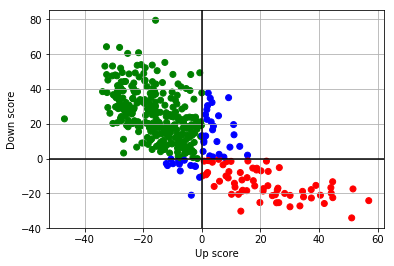

In [57]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['upscore'], results['downscore'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Up score')
plt.ylabel('Down score')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

# Mutations

Load the dataset

In [58]:
df_cna = pd.read_table('data/data_CNA.txt')
print len(df_cna)
df_cna.head()

24776


,Hugo_Symbol,Entrez_Gene_Id,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,...,TCGA-QG-A5YV-01,TCGA-QG-A5YW-01,TCGA-QG-A5YX-01,TCGA-QG-A5Z1-01,TCGA-QG-A5Z2-01,TCGA-QL-A97D-01,TCGA-RU-A8FL-01,TCGA-SS-A7HO-01,TCGA-T9-A92H-01,TCGA-WS-AB45-01
0,ACAP3,116983.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
1,ACTRT2,140625.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
2,AGRN,375790.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
3,ANKRD65,441869.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0
4,ATAD3A,55210.0,0,-1,0,-1,-1,0,0,0,...,-1,0,0,0,0,0,-1,-1,-1,0


In [59]:
df_cna['Hugo_Symbol'].to_csv('data/gene_list.csv')

In [75]:
cna = []
for p in df_cna.columns[2:]:
    nb_cna = np.count_nonzero(df_cna[p])
    #nb_mut = np.sum(mutations[p])
    cna.append([p,nb_cna])
cna = pd.DataFrame(cna)
cna.columns = ['id','cna']

try:
    results = results.drop(['cna'],axis=1)
except:
    pass
results = results.merge(cna, how='inner', on='id')
print len(results)
results.head()

376


,id,upscore,downscore,ces,cat,label,cna
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,15735
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,8859
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,18611
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,19624
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,6452


Attribute a mutation score to each patient

In [78]:
mut = []
for p in df_cna.columns[2:]:
    nb_mut = np.count_nonzero(~pd.isnull(df_cna[p]))
    #nb_mut = np.sum(mutations[p])
    mut.append([p,nb_mut])
mut = pd.DataFrame(mut)
mut.columns = ['id','mut']

#results = results.drop(['mut'],axis=1)
results = results.merge(mut, how='inner', on='id')
print len(results)
results.head()

376


,id,upscore,downscore,ces,cat,label,cna,mut
0,TCGA-D5-6531-01,-7.6179,12.6261,1.8834,mss,1.0,15735,24776
1,TCGA-DM-A28A-01,-15.5637,25.9099,6.4499,mss,1.0,8859,24776
2,TCGA-DC-5869-01,-9.0183,33.6345,7.8741,mss,1.0,18611,24776
3,TCGA-F4-6460-01,-25.3454,28.9109,-4.8967,mss,1.0,19624,24776
4,TCGA-DY-A1DC-01,-14.6653,20.8919,1.8764,mss,1.0,6452,24776


CES / CNA correlation.
Colors represent the MMR deficiency classification

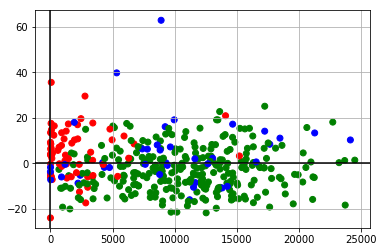

In [79]:
fig, ax = plt.subplots()
colors = ['red','green','blue']
ax.scatter(results['cna'], results['ces'],c = results['label'],cmap = matplotlib.colors.ListedColormap(colors))
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

It appears the MSS patients have way less CNA than MSI patients

# MLH1 study

In [64]:
df_expr = pd.read_table('data/cBioPortal_data_mlh1_expr.txt').transpose()
df_meth = pd.read_table('data/cBioPortal_data_mlh1_meth.txt').transpose()

In [65]:
df_expr.head()

,0
GENE_ID,4292
COMMON,MLH1
TCGA-D5-6531-01,-0.6444
TCGA-DM-A28A-01,0.643
TCGA-DC-5869-01,2.5549


In [66]:
df_meth.head()

,0
GENE_ID,4292
COMMON,MLH1
TCGA-D5-6531-01,0.018947
TCGA-DM-A28A-01,0.0248725
TCGA-DC-5869-01,0.0623723


In [67]:
df_mlh1 = df_expr.merge(df_meth, how='inner', left_index=True, right_index=True)[2:]
df_mlh1.columns = ['expr','meth']
df_mlh1.head()

,expr,meth
TCGA-D5-6531-01,-0.6444,0.018947
TCGA-DM-A28A-01,0.643,0.0248725
TCGA-DC-5869-01,2.5549,0.0623723
TCGA-F4-6460-01,0.0455,0.0460492
TCGA-DY-A1DC-01,0.2859,0.0815832


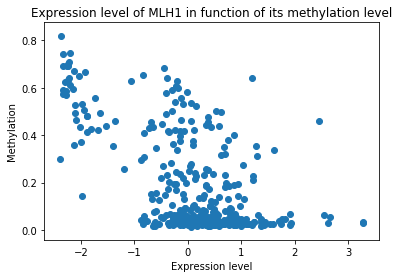

In [68]:
plt.figure()
plt.scatter(df_mlh1['expr'],df_mlh1['meth'],marker='o')
plt.xlabel('Expression level')
plt.ylabel('Methylation')
plt.title('Expression level of MLH1 in function of its methylation level')
plt.show()

# Comparison CES / MLH1

In [70]:
patients.index = patients['id']
patients = patients.drop(['id'],axis=1)
df_comp = patients.merge(df_mlh1, left_index=True, right_index=True,how = 'inner')
df_comp.head()

,ces,expr,meth
id,,,
TCGA-D5-6531-01,1.8834,-0.6444,0.018947
TCGA-DM-A28A-01,6.4499,0.643,0.0248725
TCGA-DC-5869-01,7.8741,2.5549,0.0623723
TCGA-F4-6460-01,-4.8967,0.0455,0.0460492
TCGA-DY-A1DC-01,1.8764,0.2859,0.0815832


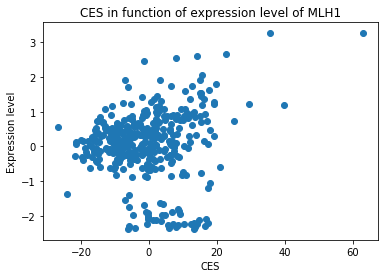

In [71]:
plt.figure()
plt.scatter(df_comp['ces'],df_comp['expr'],marker='o')
plt.xlabel('CES')
plt.ylabel('Expression level')
plt.title('CES in function of expression level of MLH1')
plt.show()

In [72]:
quantile = []
for i in [0.25,0.5,0.75]:
    quantile.append(float(df_comp['expr'].quantile(i)))
    
quantile

[-0.270275, 0.1573, 0.584325]

In [73]:
for ix,row in df_comp.iterrows():
    if row['expr']<quantile[0]:
        df_comp = df_comp.set_value(ix,'expr_cat',0)
    elif row['expr']<quantile[1]:
        df_comp = df_comp.set_value(ix,'expr_cat',1)
    elif row['expr']<quantile[2]:
        df_comp = df_comp.set_value(ix,'expr_cat',2)
    else: 
        df_comp = df_comp.set_value(ix,'expr_cat',3)
        
df_comp.head()

,ces,expr,meth,expr_cat
id,,,,
TCGA-D5-6531-01,1.8834,-0.6444,0.018947,0.0
TCGA-DM-A28A-01,6.4499,0.643,0.0248725,3.0
TCGA-DC-5869-01,7.8741,2.5549,0.0623723,3.0
TCGA-F4-6460-01,-4.8967,0.0455,0.0460492,1.0
TCGA-DY-A1DC-01,1.8764,0.2859,0.0815832,2.0


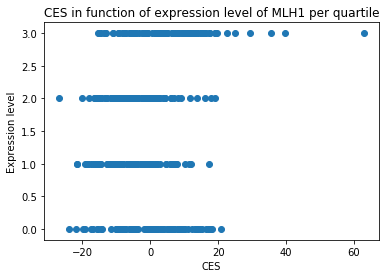

In [74]:
plt.figure()
plt.scatter(df_comp['ces'],df_comp['expr_cat'],marker='o')
plt.xlabel('CES')
plt.ylabel('Expression level')
plt.title('CES in function of expression level of MLH1 per quartile')
plt.show()